# Zomato Data Analysis 

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


1.Data Loading <br>
Start the Data analysis by importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor
from sklearn.metrics import RocCurveDisplay,roc_auc_score,accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix,auc, roc_curve
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor


read the csv dataset

In [4]:
d1=pd.read_csv("Book1.csv")
d1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [5]:
d2 = pd.read_csv("zomato.csv", encoding='ISO-8859-1')
d2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
d2.shape

(9551, 21)

we observe that both the data have the same number of rows and columns , we can now merge our datas

In [7]:
df=pd.merge(d1,d2,on='Country Code')
df.head(2)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71


In [8]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
df.nunique()

Country Code              15
Country                   15
Restaurant ID           9551
Restaurant Name         7446
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

we observe various unique and continous values , but switch to order menu is same , so delete 

In [10]:
df.drop('Switch to order menu',inplace=True,axis=1)

In [11]:
df['Country'].unique()

array(['India', 'Australia', 'Brazil', 'Canada', 'Indonesia',
       'New Zealand', 'Phillipines', 'Qatar', 'Singapore', 'South Africa',
       'Sri Lanka', 'Turkey', 'UAE', 'United Kingdom', 'United States'],
      dtype=object)

In [12]:
df['Country Code'].unique()

array([  1,  14,  30,  37,  94, 148, 162, 166, 184, 189, 191, 208, 214,
       215, 216], dtype=int64)

In [13]:
df['Rating color'].unique()

array(['Yellow', 'Green', 'Orange', 'Dark Green', 'White', 'Red'],
      dtype=object)

In [14]:
df['Rating text'].unique()

array(['Good', 'Very Good', 'Average', 'Excellent', 'Not rated', 'Poor'],
      dtype=object)

In [15]:
df['Votes'].unique()

array([ 140,   71,   94, ..., 1868, 1746,  575], dtype=int64)

In [16]:
df['Currency'].unique()

array(['Indian Rupees(Rs.)', 'Dollar($)', 'Brazilian Real(R$)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Botswana Pula(P)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)', 'Emirati Diram(AED)', 'Pounds(\x8c£)'],
      dtype=object)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

2.Data Cleaning:

Deleting redundant columns.<br>
Renaming the columns.<br>
Dropping duplicates.<br>
Cleaning individual columns.


as our target is related to food and price, related features are sufficiant for data analysis

In [18]:

# df = df.drop(['Country Code','Restaurant ID','City','Longitude', 'Latitude','Restaurant Name',
#          'Is delivering now','Switch to order menu','Address','Locality','Locality Verbose'], axis=1)
# df = df.reset_index(drop=True)

In [19]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [20]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

In [21]:
df.duplicated().sum()

0

<Axes: >

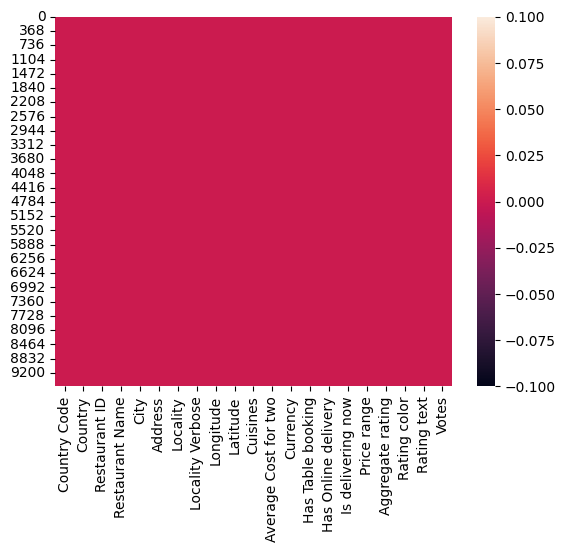

In [22]:
sns.heatmap(df.isnull())

In [23]:
ccol = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",ccol)
print("\n")

ncol = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns are:",ncol)

Categorical columns are: Index(['Country', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Rating color',
       'Rating text'],
      dtype='object')


Numerical columns are: Index(['Country Code', 'Restaurant ID', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')


In [24]:
df.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


average cost for two ranges from 0 to 800,000, with a mean of approximately 1199.21. The aggregate rating ranges from 0 to 4.9, with a mean of 2.666. The dataset contains a total of 9551 entries.

# data visulalization
3 : Using plots to find relations between the features.

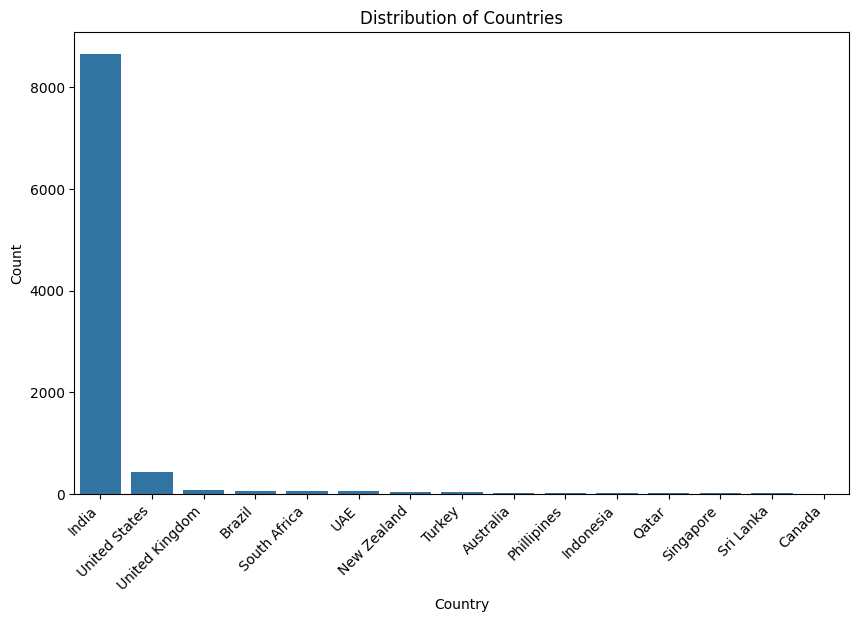

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

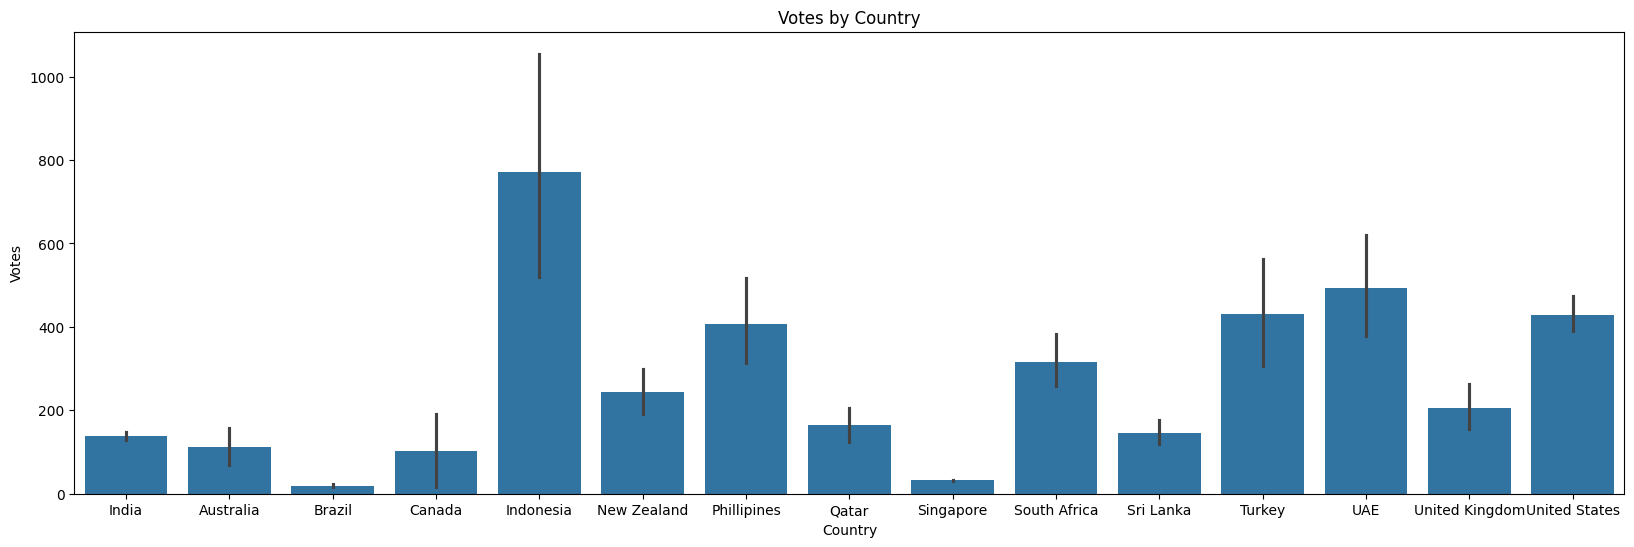

In [26]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Country', y='Votes', data=df)
plt.title('Votes by Country')
plt.xlabel('Country')
plt.ylabel('Votes')
plt.show()

Text(0.5, 1.0, 'graphical hotel distribution')

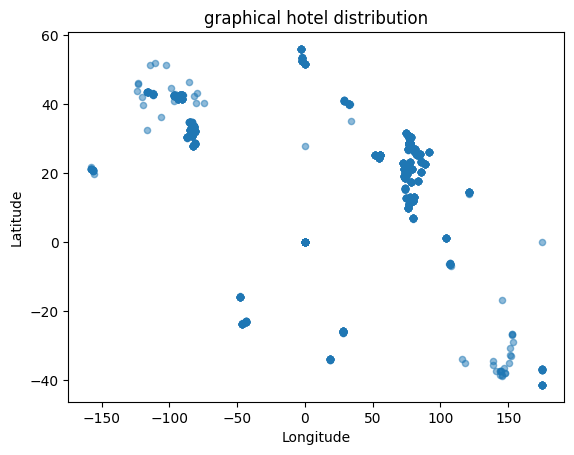

In [27]:
df.plot(x="Longitude", y="Latitude", kind="scatter",alpha=0.5)
plt.title("graphical hotel distribution")

In [28]:
df['Rating color'].unique()

array(['Yellow', 'Green', 'Orange', 'Dark Green', 'White', 'Red'],
      dtype=object)

<Axes: xlabel='Rating color', ylabel='count'>

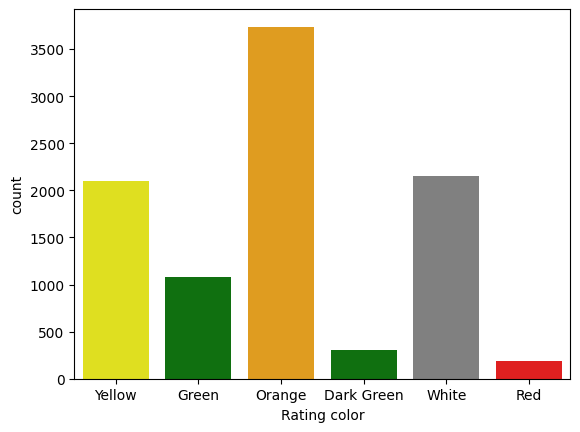

In [29]:
sns.countplot(x='Rating color', data=df, palette=['Yellow', 'Green', 'Orange', 'green', 'grey', 'Red'])


<Axes: xlabel='Aggregate rating', ylabel='Rating color'>

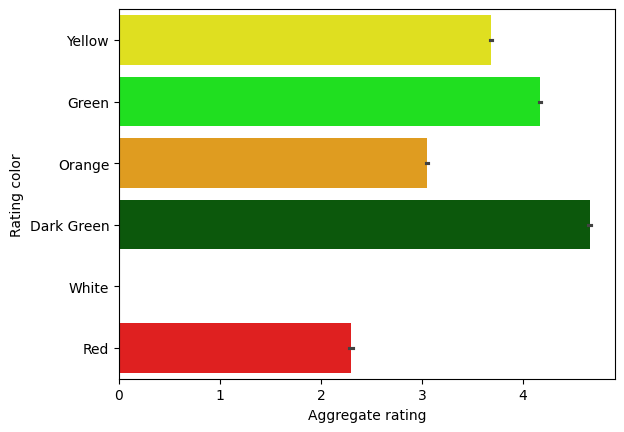

In [30]:

sns.barplot(x='Aggregate rating', y='Rating color', hue='Rating color', data=df, palette=['Yellow', "#00FF00", 'Orange', "#006400", 'grey', 'Red'])


In [31]:
col= ['Has Table booking', 'Has Online delivery', 'Is delivering now', 
     'Price range', 'Rating color', 'Rating text']

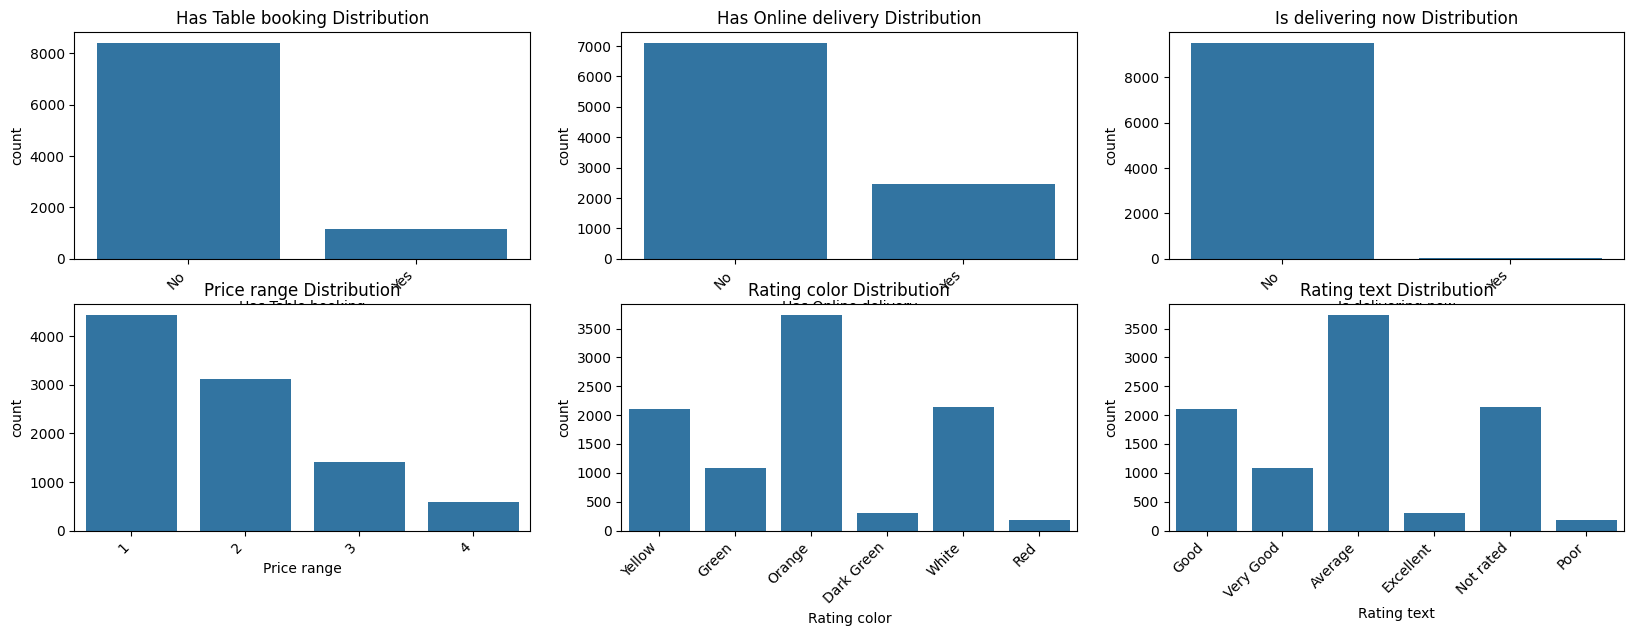

In [32]:
plt.figure(figsize=(20, 10))
for i in col:
    plt.subplot(3,3, col.index(i) + 1)
    sns.countplot(x=i, data=df)
    plt.xticks(rotation=45, ha="right")
    plt.title(f'{i} Distribution')

In [33]:
ncol

Index(['Country Code', 'Restaurant ID', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

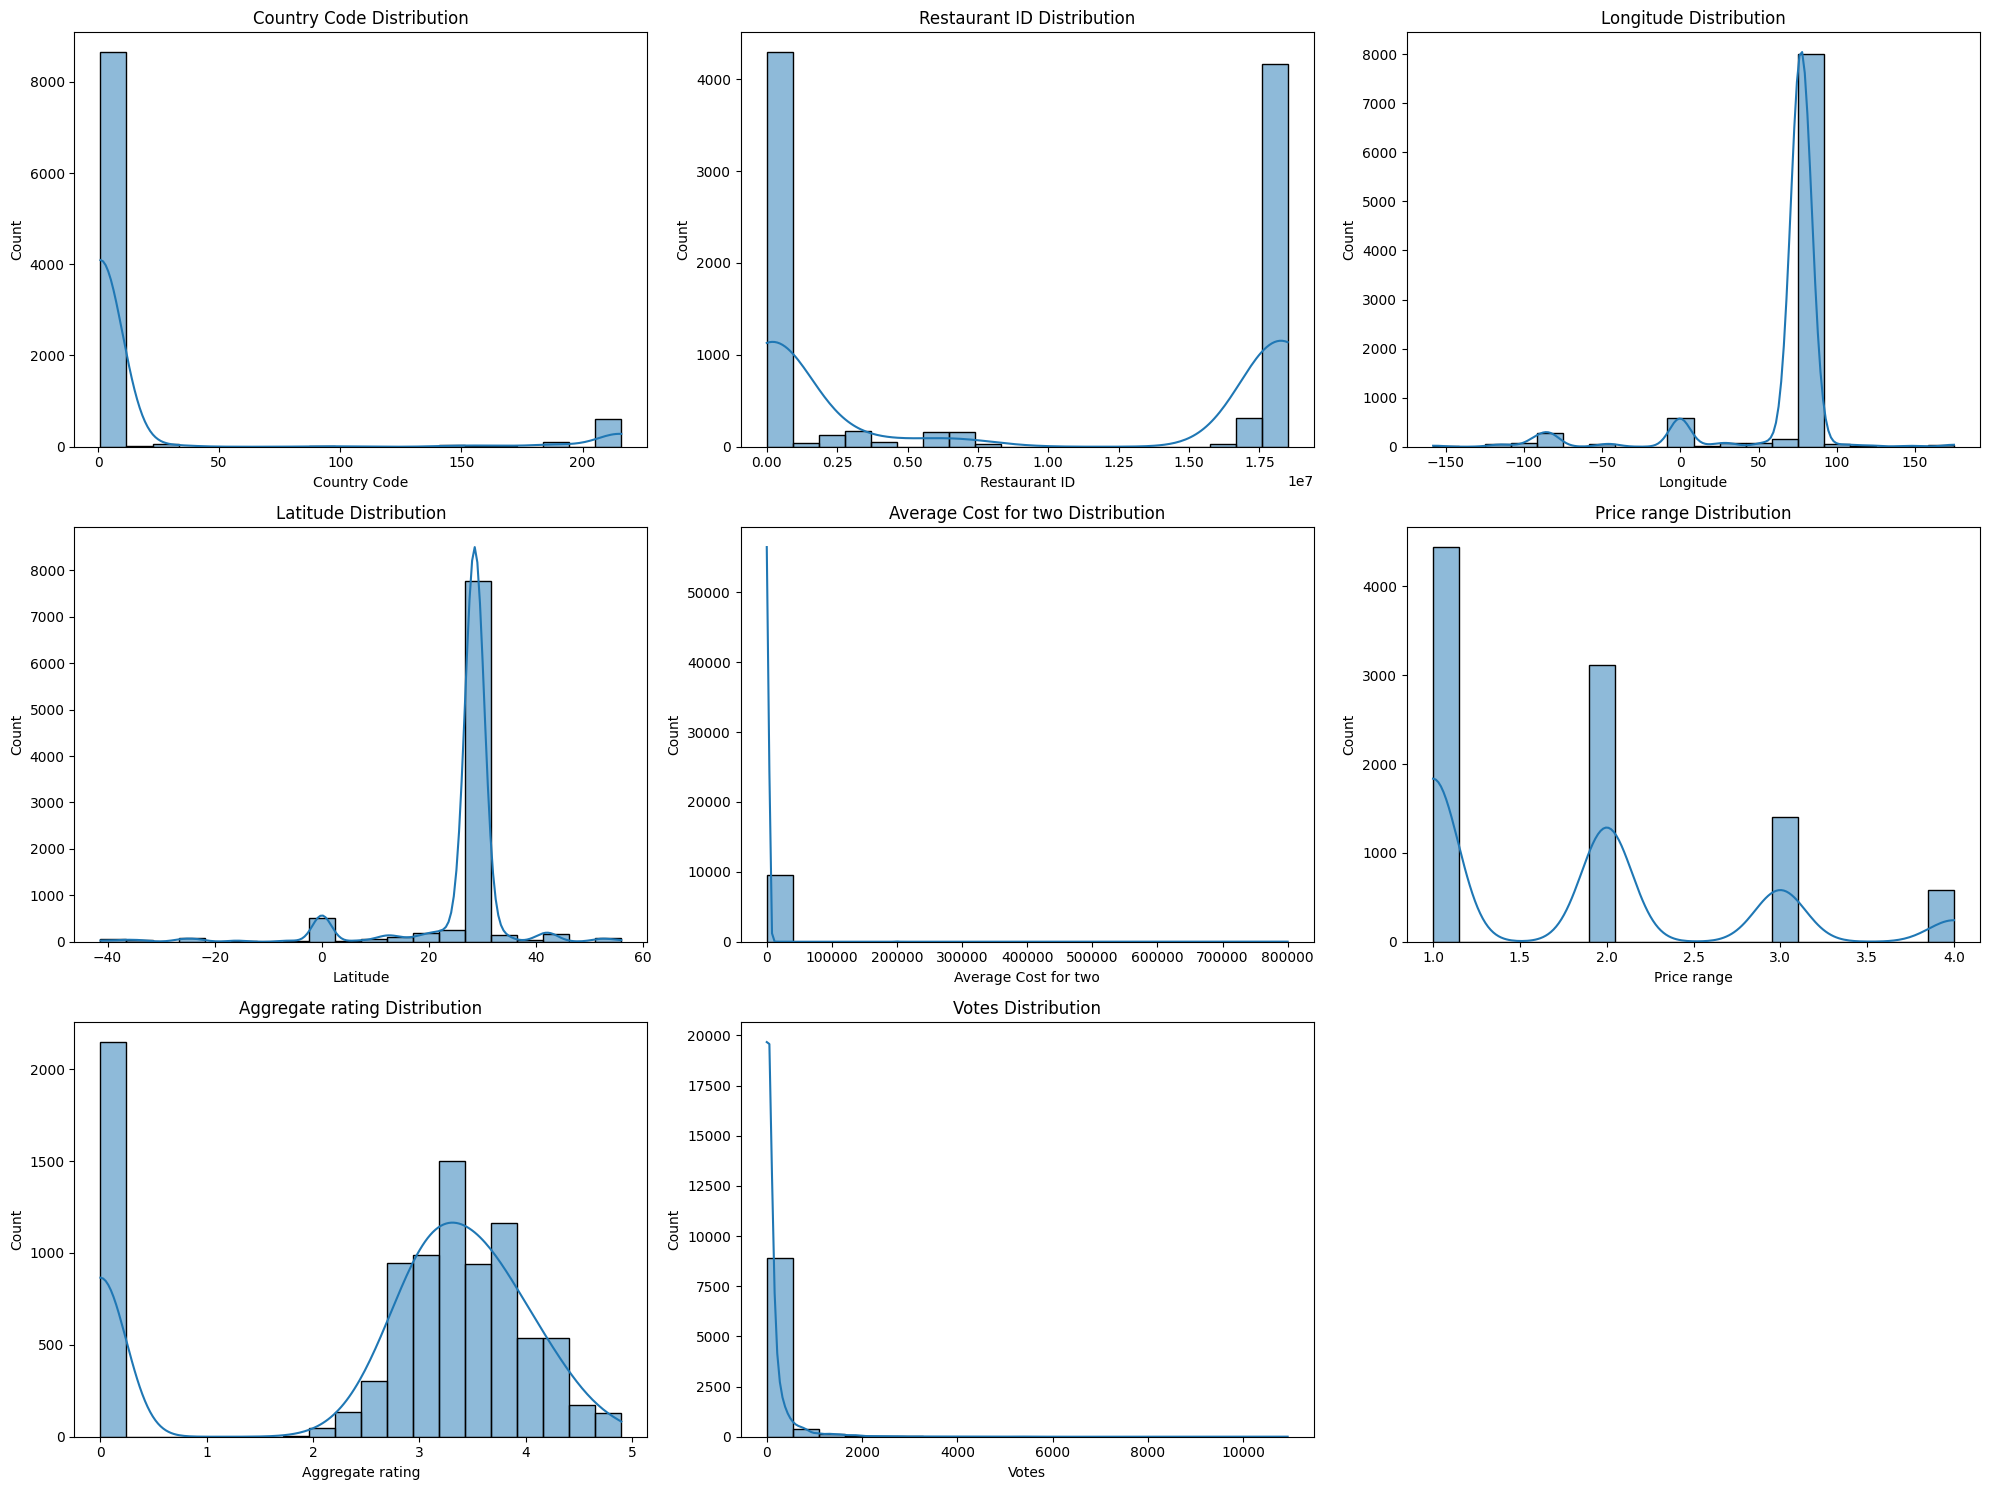

In [34]:
plt.figure(figsize=(20, 15))
for var in ncol:
    plt.subplot(3,3, ncol.get_loc(var) + 1)
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'{var} Distribution')

plt.tight_layout()
plt.show()


In [35]:
df[ccol].nunique()

Country                  15
Restaurant Name        7446
City                    141
Address                8918
Locality               1208
Locality Verbose       1265
Cuisines               1825
Currency                 12
Has Table booking         2
Has Online delivery       2
Is delivering now         2
Rating color              6
Rating text               6
dtype: int64

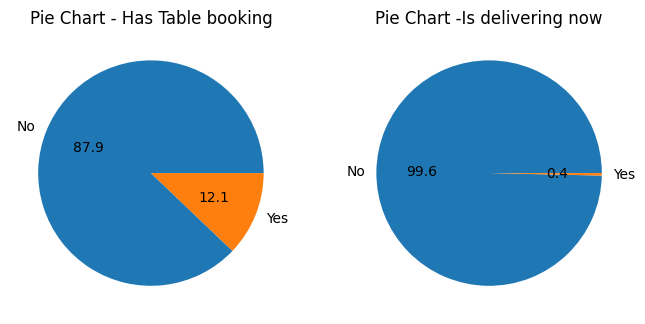

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

df.groupby('Has Table booking').size().plot(kind='pie', autopct='%.1f', ax=axes[0])
axes[0].set_title('Pie Chart - Has Table booking')

df.groupby('Is delivering now').size().plot(kind='pie', autopct='%.1f', ax=axes[1])
axes[1].set_title('Pie Chart -Is delivering now')
plt.show()

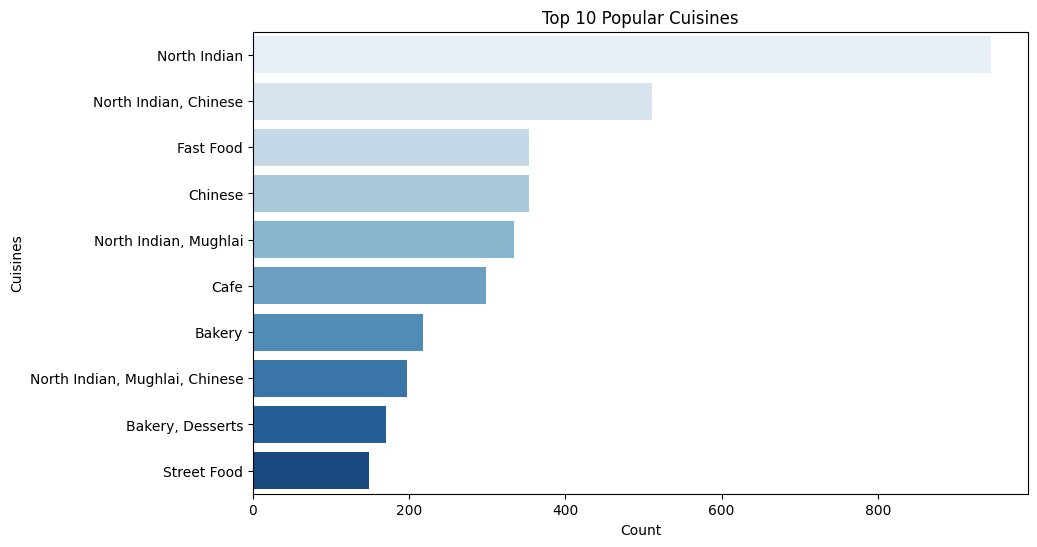

In [37]:
popular= df['Cuisines'].value_counts()[:10].reset_index(name='count')
plt.figure(figsize=(10, 6))

sns.barplot(x='count', y='Cuisines', data=popular, palette='Blues')

plt.title('Top 10 Popular Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.show()

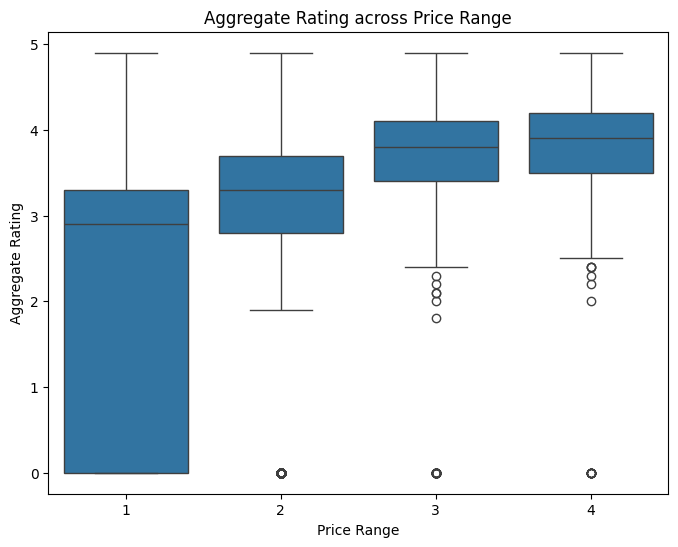

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Price range', y='Aggregate rating')
plt.title('Aggregate Rating across Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

LabelEncode for categorical data

In [39]:
LE = LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i] = LE.fit_transform(df[i])
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3,3400025,3201,1,4553,17,17,78.011544,27.161661,...,850,4,0,0,0,3,3.9,5,2,140
1,1,3,3400341,5261,1,4605,17,17,0.000000,0.000000,...,700,4,0,0,0,2,3.5,5,2,71
2,1,3,3400005,6919,1,6234,17,17,78.011608,27.160832,...,500,4,0,0,0,2,3.6,5,2,94
3,1,3,3400021,1637,1,100,204,205,77.998092,27.195928,...,400,4,0,0,0,2,4.0,1,5,87
4,1,3,3400017,4922,1,1316,204,205,78.007553,27.201725,...,1000,4,0,0,0,3,4.2,1,5,177


checking for outliers

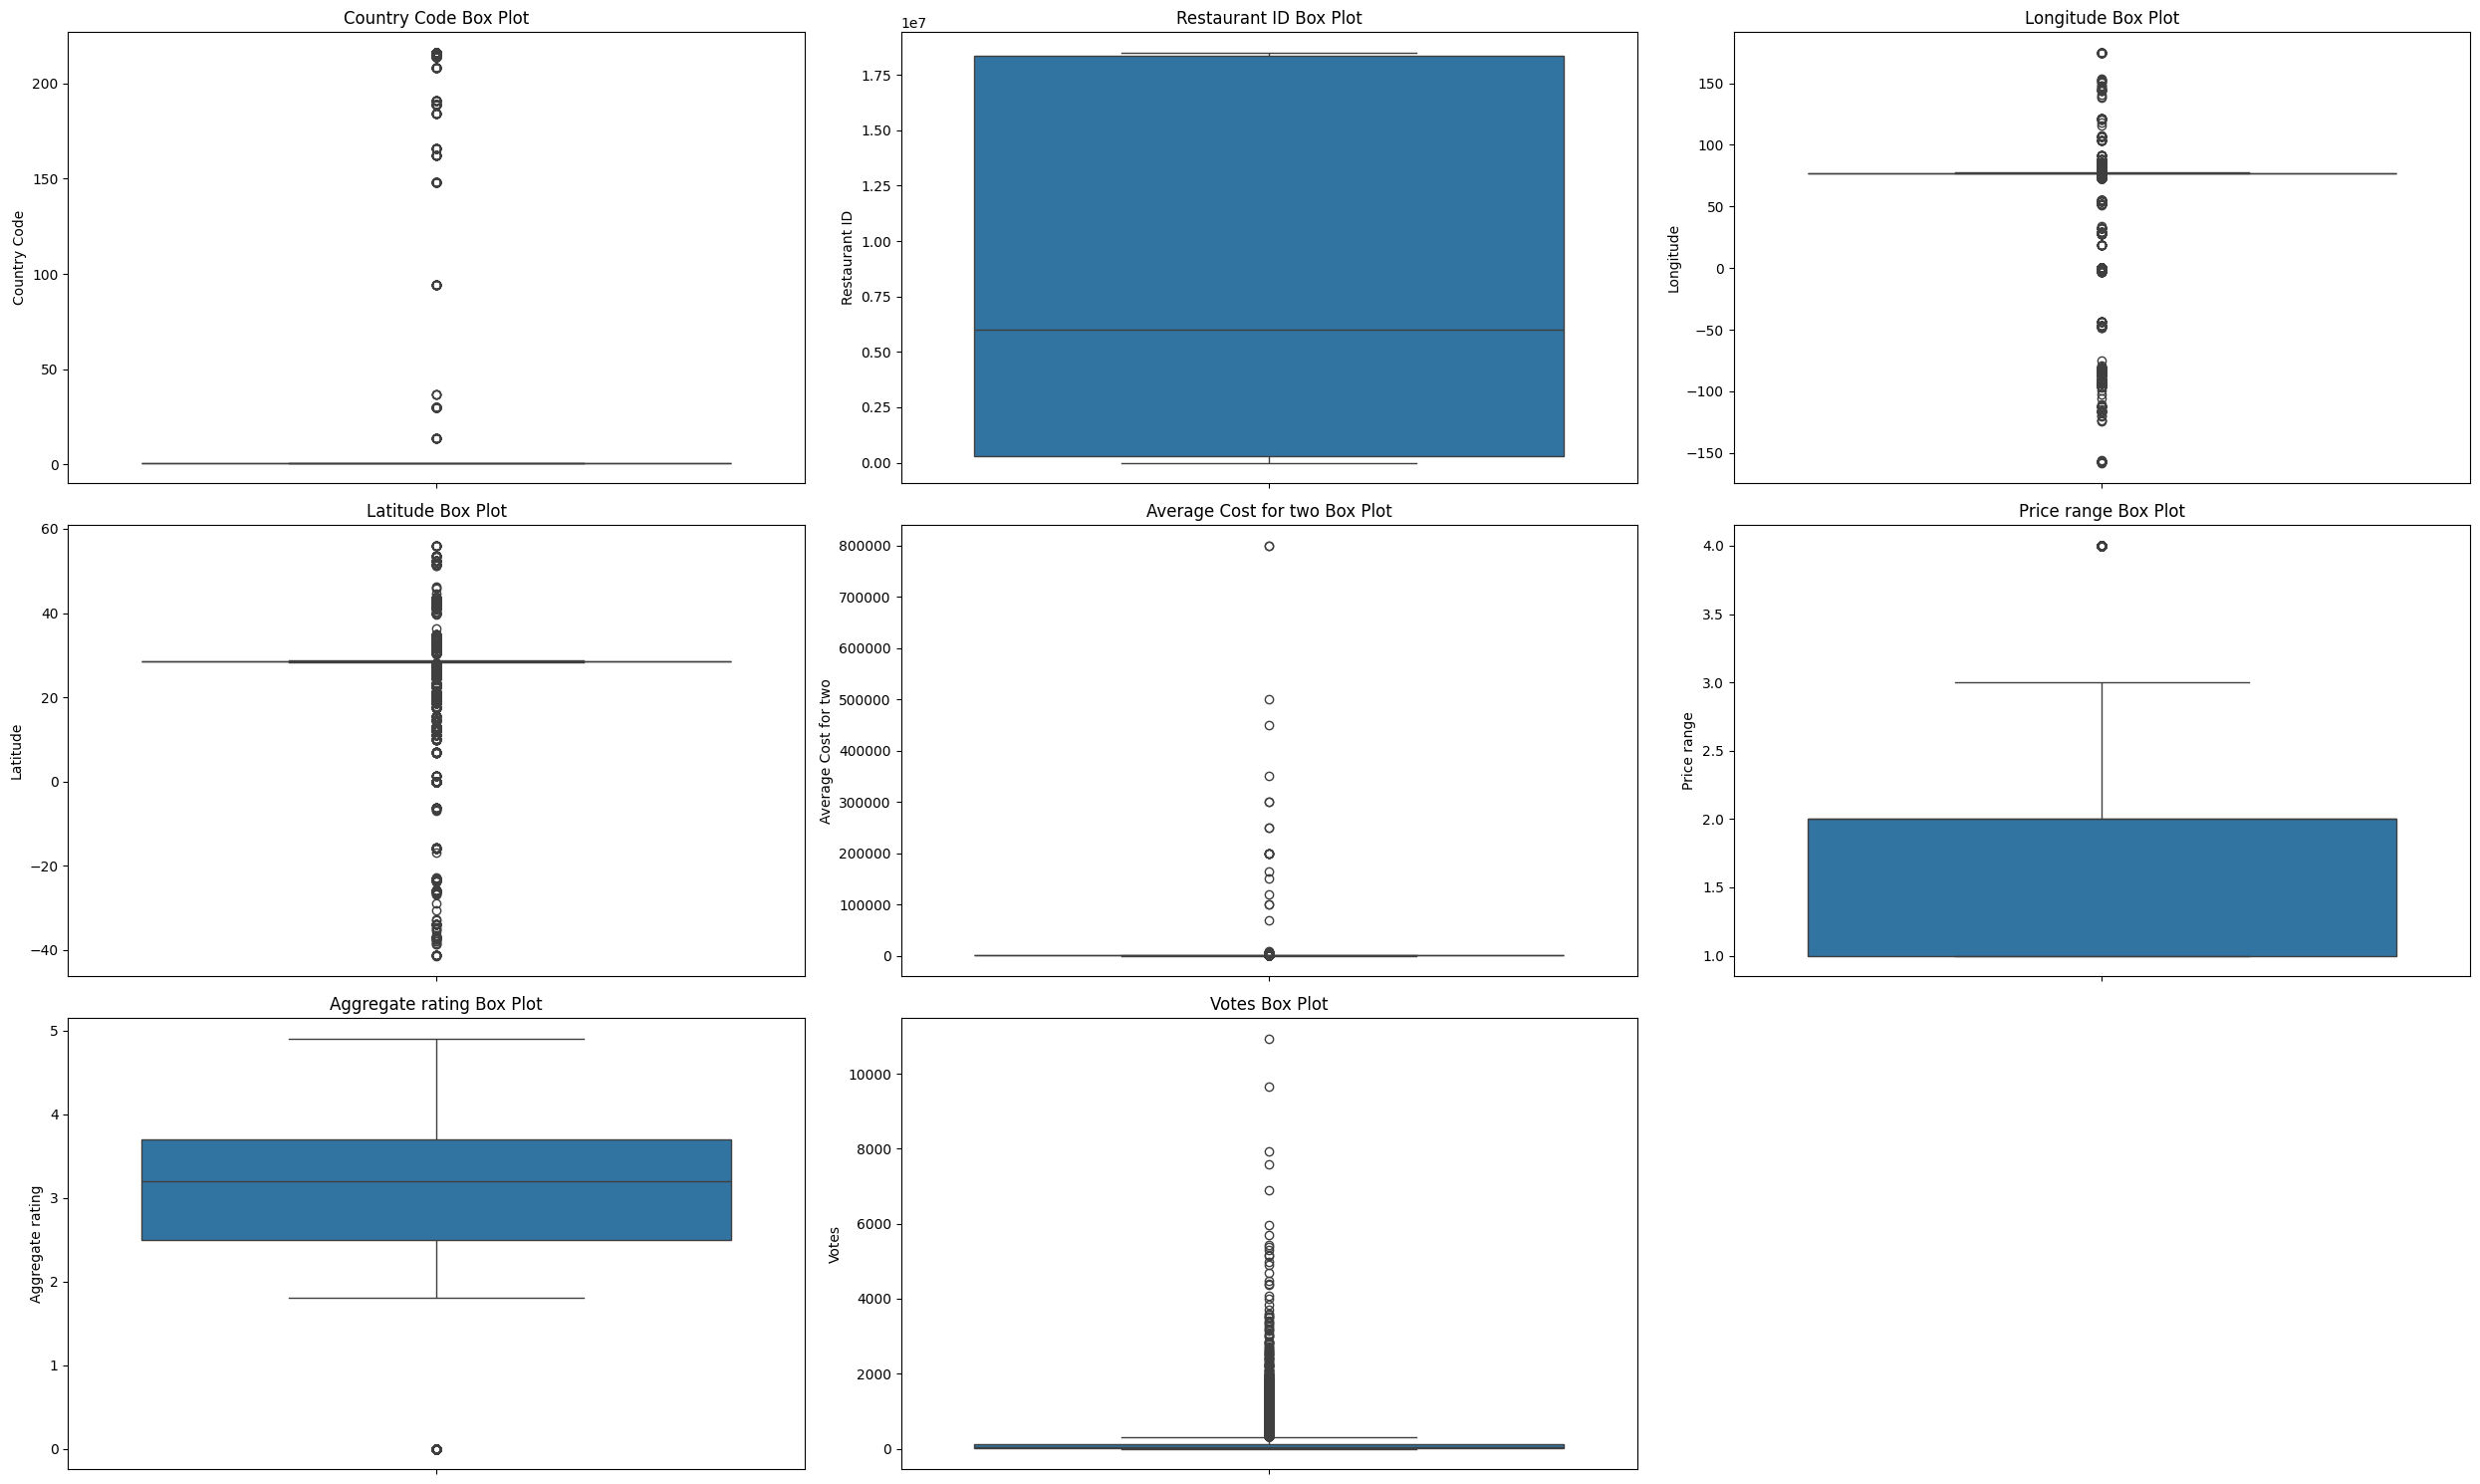

In [40]:
plt.figure(figsize=(25, 15))
for i in ncol:
    plt.subplot(3,3, ncol.get_loc(i) + 1)
    sns.boxplot(y=i, data=df)
    plt.title(f'{i} Box Plot')

plt.tight_layout()
plt.show()

OUTLIER REMOVAL

In [41]:
df.shape

(9551, 21)

In [42]:
# METHOD 1
z=np.abs(zscore(df))
threshold=3
df1=df[(z<4).all(axis=1)]

In [43]:
df1.shape

(9072, 21)

In [44]:
print("data loss ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss  5.015181656371061


In [45]:
df=df1

Heatmap for checking correlation

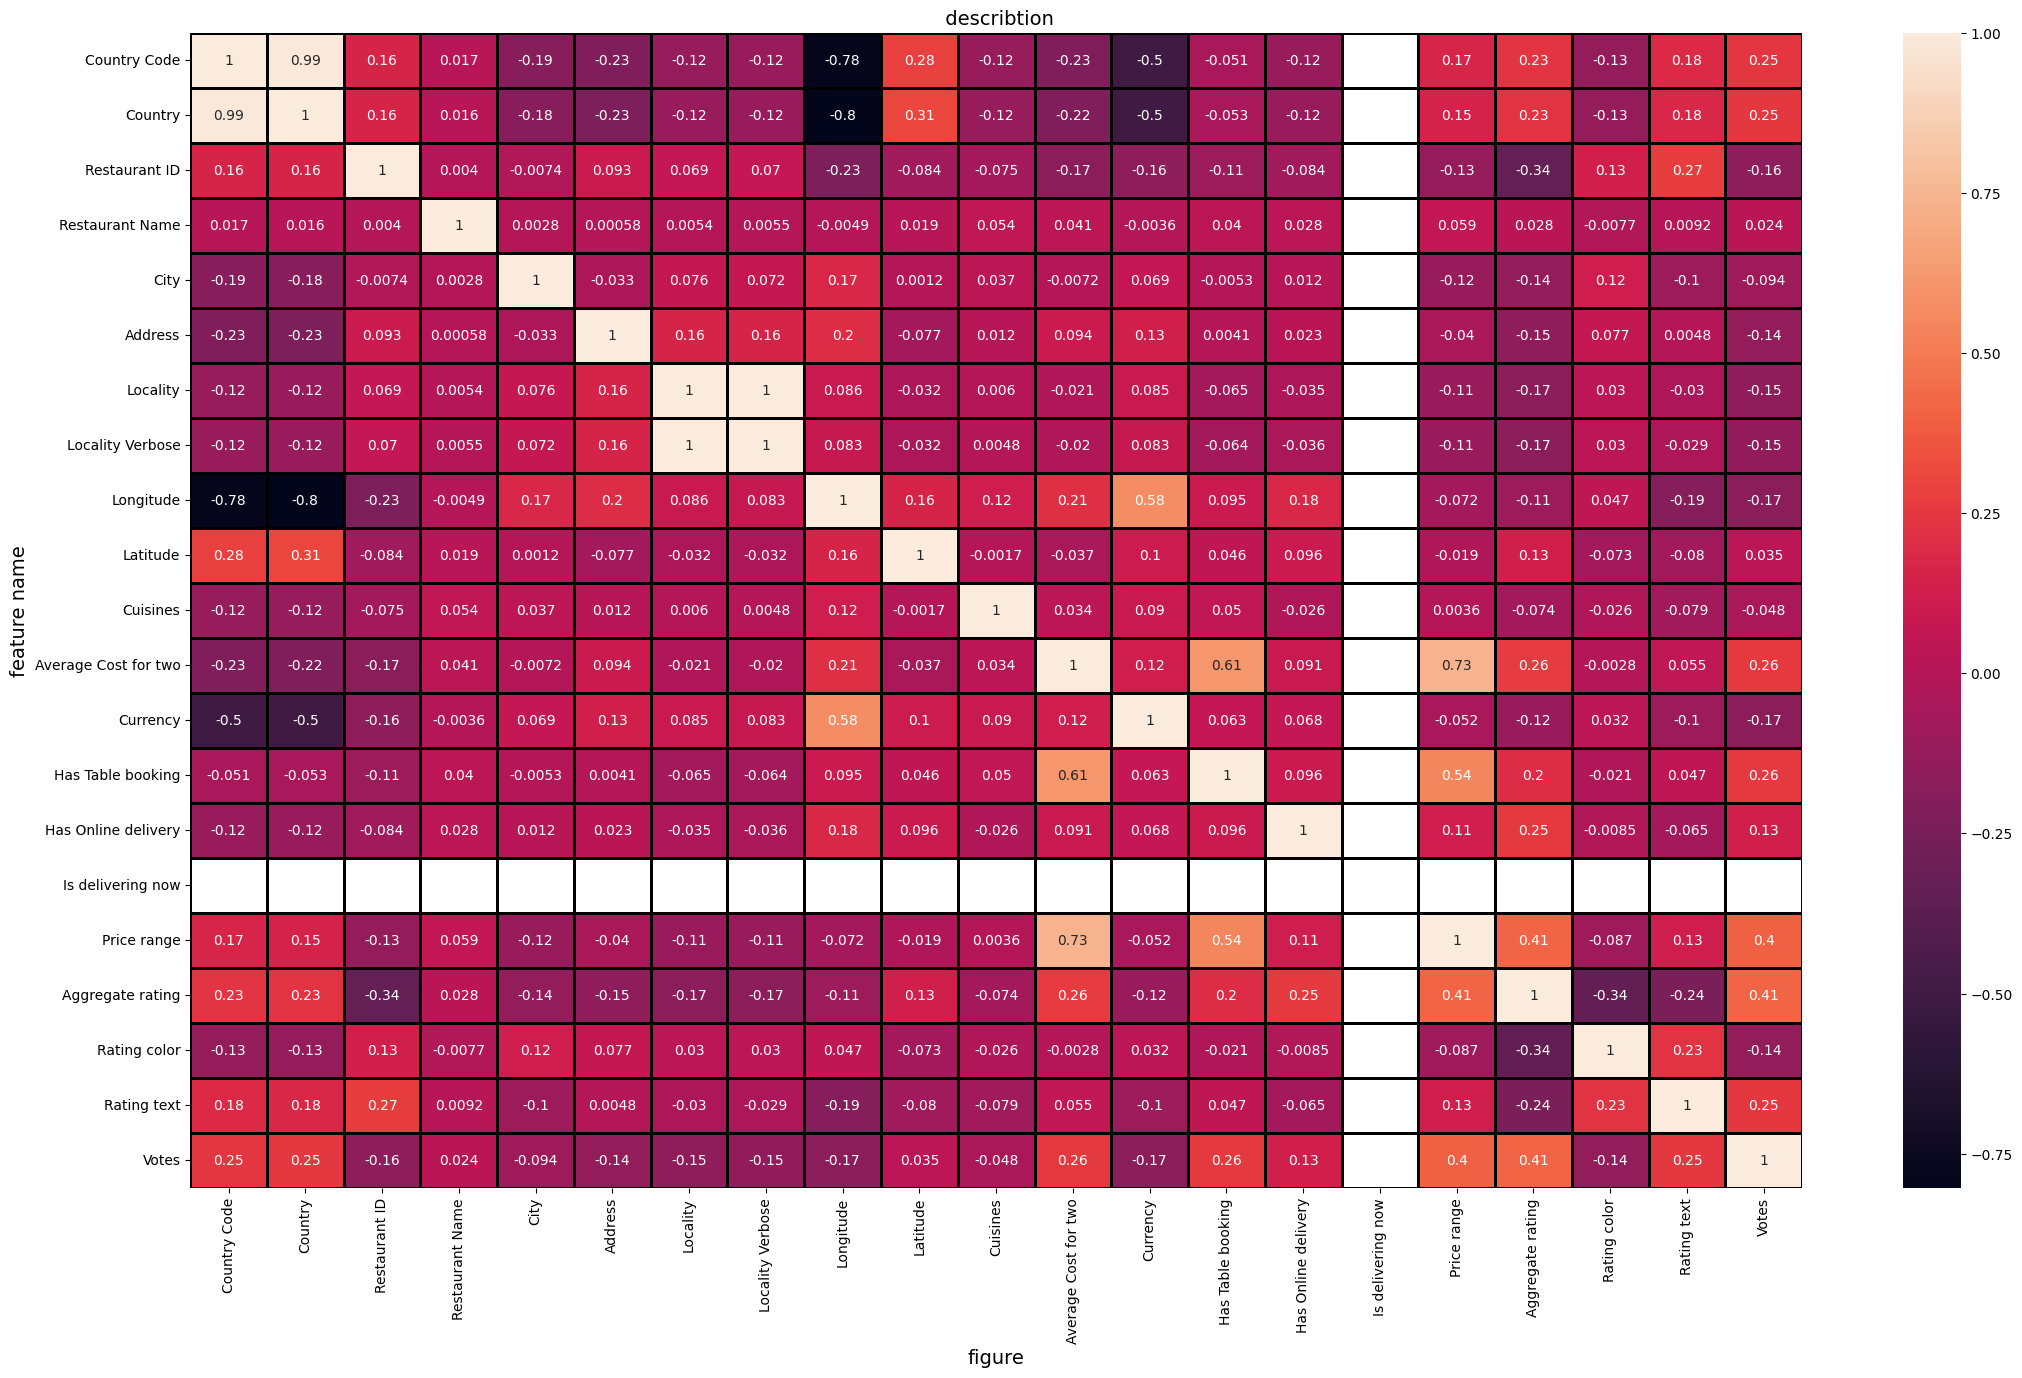

In [46]:
plt.figure(figsize = (26, 15))
sns.heatmap(df.corr(),linewidths=0.8,fmt='.2g',linecolor="black",annot=True)
plt.xlabel('figure',fontsize=14)
plt.ylabel("feature name",fontsize=14)
plt.title(" describtion",fontsize=14)
plt.show()

FINDING SKEWNESS OF DATA

In [47]:
df.skew()

Country Code            3.810432
Country                 3.876124
Restaurant ID           0.055264
Restaurant Name         0.046210
City                   -1.359276
Address                -0.050603
Locality               -0.278688
Locality Verbose       -0.207554
Longitude              -3.200388
Latitude               -2.252924
Cuisines               -0.327997
Average Cost for two    3.574265
Currency               -0.766026
Has Table booking       2.305242
Has Online delivery     1.077413
Is delivering now       0.000000
Price range             0.963053
Aggregate rating       -0.922193
Rating color            0.055537
Rating text             0.431745
Votes                   3.822476
dtype: float64

In [48]:
df['Average Cost for two'] = np.log1p(df['Average Cost for two'])
df['Votes'] = np.log1p(df['Votes'])

# Target : Average Cost for two

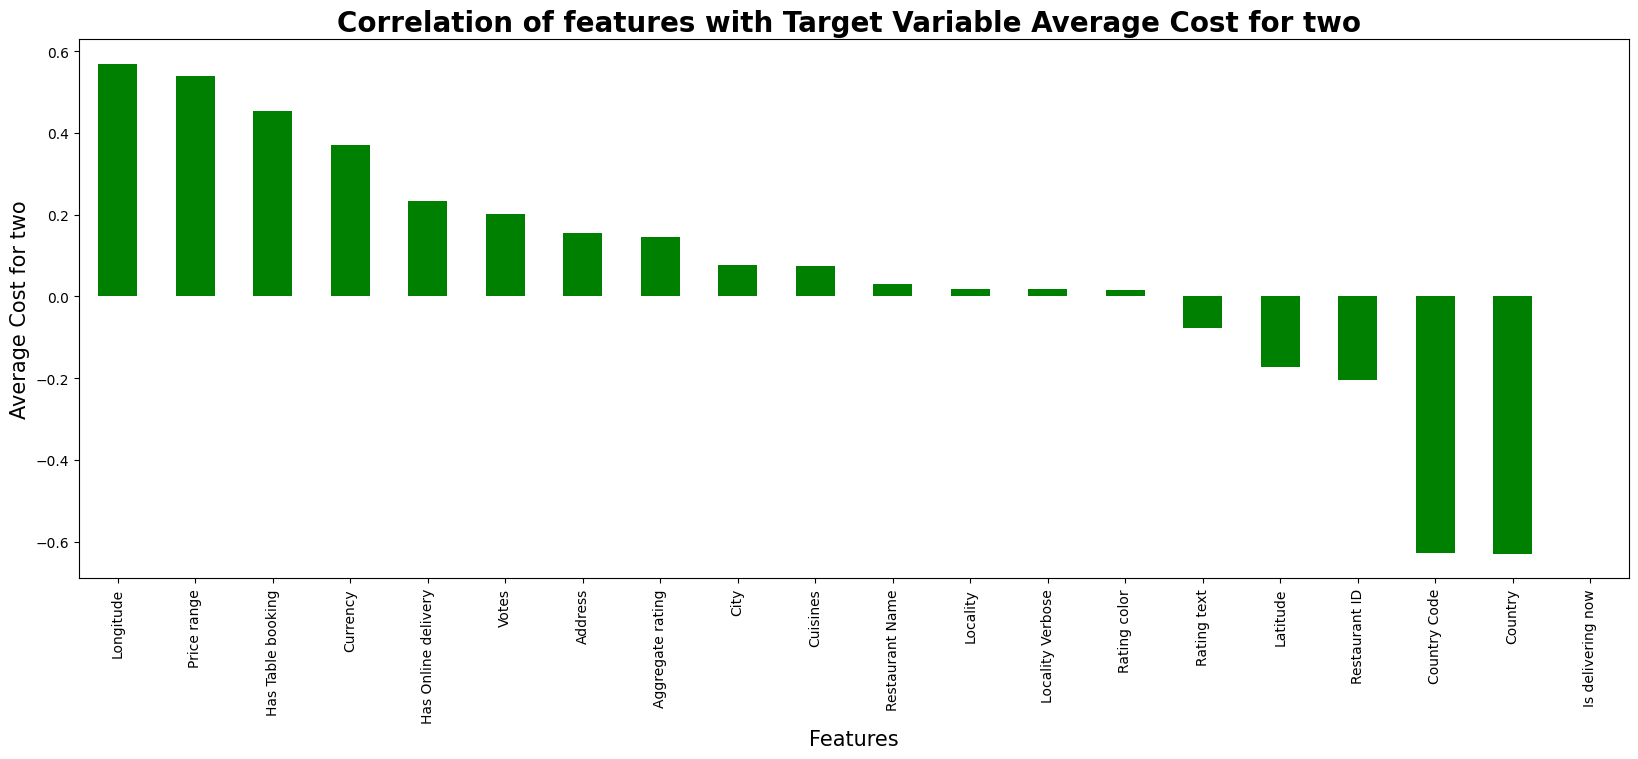

In [49]:
plt.figure(figsize = (20,7))
df.corr()['Average Cost for two'].drop(['Average Cost for two']).sort_values(ascending=False).plot(kind='bar',color = 'green')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Average Cost for two',fontsize=15)
plt.title('Correlation of features with Target Variable Average Cost for two ',fontsize = 20,fontweight='bold')
plt.show()

In [50]:
def corr_columns(df, threshold):
    correlated_columns = set()
    for i, col1 in enumerate(df.columns):
        for j, col2 in enumerate(df.columns[:i]):
            if abs(df[col1].corr(df[col2])) > threshold:
                correlated_columns.add(col1)
    
    return correlated_columns


In [51]:
features = corr_columns(df, 0.5)
len(set(features))

7

In [52]:
features

{'Average Cost for two',
 'Country',
 'Currency',
 'Locality Verbose',
 'Longitude',
 'Price range',
 'Votes'}

In [53]:
df1 = df[['Country','Currency', 'Has Table booking', 'Price range', 'Aggregate rating', 'Votes', 'Average Cost for two']]

splitting data into train and test data

In [54]:
x = df1.drop(['Average Cost for two'], axis=1)
y = df1['Average Cost for two']

In [55]:
print(x.shape, y.shape)

(9072, 6) (9072,)


Scaling the train features

In [56]:
scaler= StandardScaler()
x= scaler.fit_transform(x)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [58]:
print('Training set size - ' , x_train.shape)
print('Testing set size - ' , x_test.shape)

Training set size -  (6350, 6)
Testing set size -  (2722, 6)


Model buidling

In [59]:
model={'dt':DecisionTreeRegressor(),'rf':RandomForestRegressor(),'lR': LinearRegression(),
       'svr': SVR(),'knn':KNeighborsRegressor(),'rid':Ridge(),'ls':Lasso(),'gb':GradientBoostingRegressor(),'et':ExtraTreesRegressor(),}     
print(model)

{'dt': DecisionTreeRegressor(), 'rf': RandomForestRegressor(), 'lR': LinearRegression(), 'svr': SVR(), 'knn': KNeighborsRegressor(), 'rid': Ridge(), 'ls': Lasso(), 'gb': GradientBoostingRegressor(), 'et': ExtraTreesRegressor()}


In [60]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([5.34920487, 5.75081544, 6.30925645, ..., 5.56825694, 6.37885681,
       6.08209086])

In [61]:
value.score(x_train,y_train)

0.9210046351256678

In [62]:
value.score(x_test,y_test)

0.8397458955508661

In [63]:
mae = {}
mse = {}
r2 = {}
rmse = {}

for key, value in model.items():
    y_pred = value.predict(x_test)
    
    mae[key] = mean_absolute_error(y_test, y_pred)
    mse[key] = mean_squared_error(y_test, y_pred)
    r2[key] = r2_score(y_test, y_pred)
    rmse[key] = np.sqrt(mse[key])

details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
})

print("\nDetails for each model:")
print(details)
best_model = min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model)



Details for each model:
          MAE       MSE      RMSE        R2
dt   0.291252  0.186606  0.431979  0.811841
rf   0.265946  0.153735  0.392090  0.844985
lR   0.271613  0.161228  0.401532  0.837430
svr  0.250665  0.143404  0.378687  0.855402
knn  0.265334  0.155625  0.394493  0.843079
rid  0.271606  0.161230  0.401534  0.837428
ls   0.708264  0.991964  0.995974 -0.000223
gb   0.252585  0.134481  0.366716  0.864399
et   0.272329  0.158931  0.398661  0.839746

Best Model based on RMSE: gb


check results of our final model with best parameters

Training Set Metrics:
MAE: 0.14314429984024768
MSE: 0.07765326369142421
RMSE: 0.2786633518987099
R2 Score: 92.10046351256477 %

Testing Set Metrics:
MAE: 0.2867158710030563
MSE: 0.1796769954127496
RMSE: 0.42388323322909294
R2 Score: 81.88270143456874 %


,Y Test,Pred
458,6.111467,5.349205
7310,5.860786,5.750815
6587,6.216606,6.309256
1432,6.908755,7.370968
5384,6.803505,6.685861


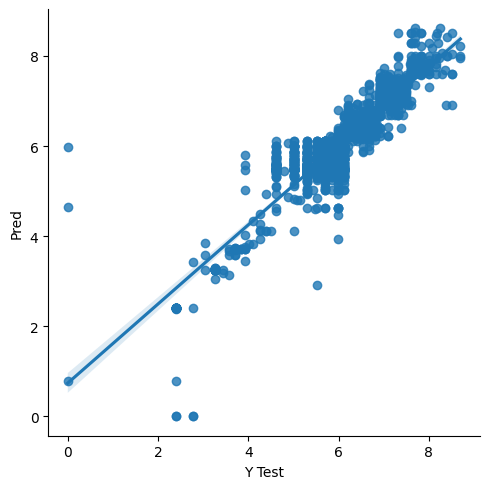

In [64]:
mod = GradientBoostingRegressor(max_depth=20, n_estimators=500, min_samples_split=2)
mod.fit(x_train, y_train)

y_pred_train = mod.predict(x_train)
y_pred_test = mod.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Training Set Metrics:")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R2 Score:", r2_score(y_train, y_pred_train)*100, '%')

print("\nTesting Set Metrics:")
print("MAE:", mae_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R2 Score:", r2_score(y_test, y_pred_test)*100, '%')

data = pd.DataFrame({'Y Test': y_test, 'Pred': y_pred_test}, columns=['Y Test', 'Pred'])
sns.lmplot(x='Y Test', y='Pred', data=data, palette='rainbow')
data.head()

# TARGET :Price range

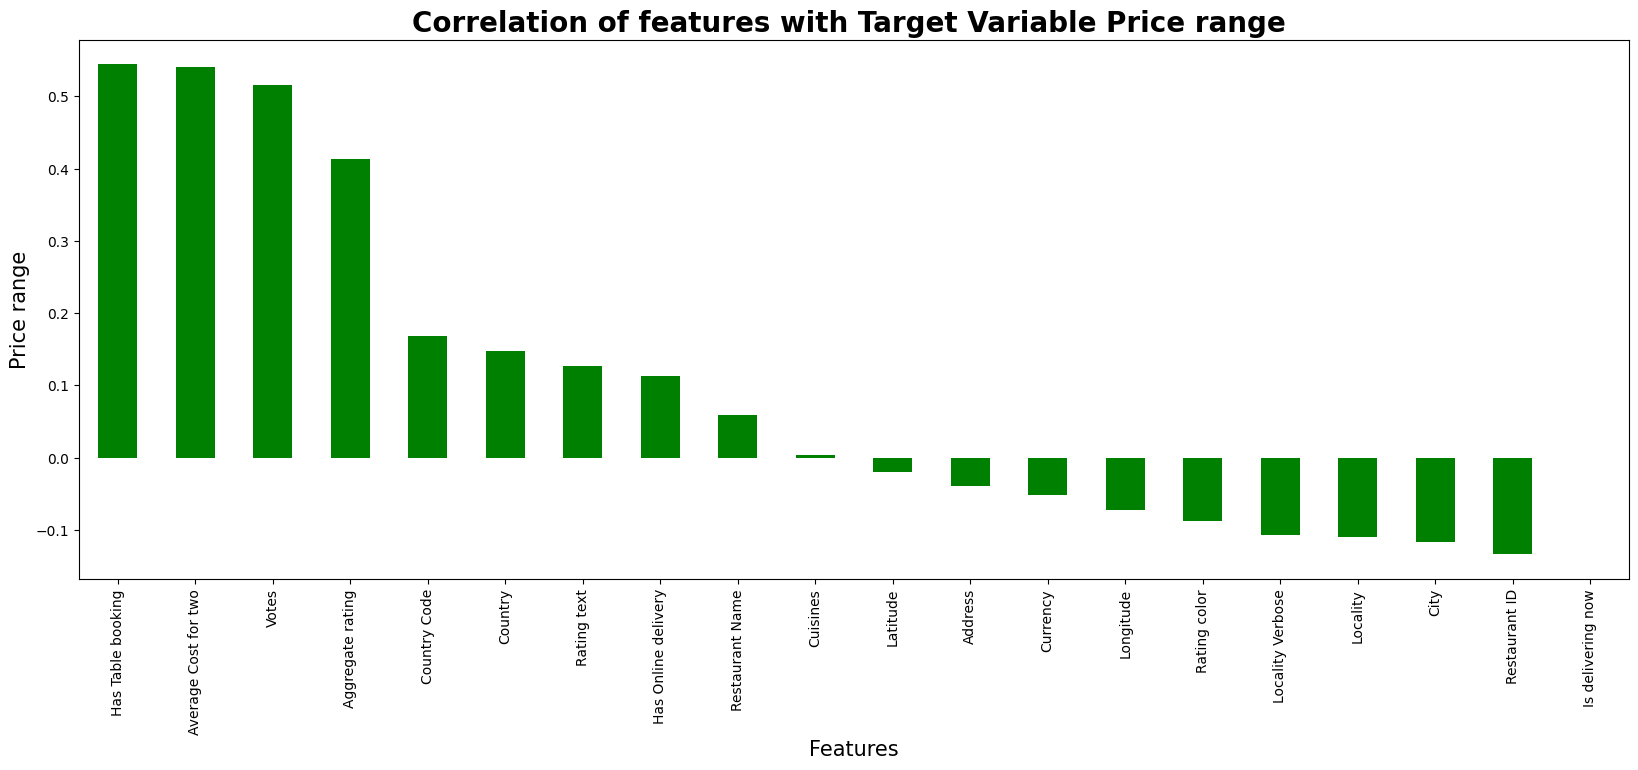

In [65]:
plt.figure(figsize = (20,7))
df.corr()['Price range'].drop(['Price range']).sort_values(ascending=False).plot(kind='bar',color = 'green')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price range',fontsize=15)
plt.title('Correlation of features with Target Variable Price range ',fontsize = 20,fontweight='bold')
plt.show()

In [66]:
df2 = df[['Country','Currency', 'Has Table booking', 'Price range', 'Aggregate rating', 'Votes', 'Average Cost for two']]

In [67]:
x=df2.drop('Price range',axis=1)
y=df2['Price range']

In [68]:
print(x.shape)
print(y.shape)

(9072, 6)
(9072,)


In [69]:
print('Training set size - ' , x_train.shape)
print('Testing set size - ' , x_test.shape)

Training set size -  (6350, 6)
Testing set size -  (2722, 6)


In [70]:
y.value_counts()

Price range
1    4402
2    3002
3    1220
4     448
Name: count, dtype: int64

In [71]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

In [72]:
y1.value_counts()

Price range
3    4402
2    4402
4    4402
1    4402
Name: count, dtype: int64

In [73]:
print(x.shape, y.shape)

(9072, 6) (9072,)


In [74]:
scaler= StandardScaler()
x= scaler.fit_transform(x)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [76]:
print('Training set size - ' , x_train.shape)
print('Testing set size - ' , x_test.shape)

Training set size -  (6350, 6)
Testing set size -  (2722, 6)


In [77]:
model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression(),'nb':GaussianNB() ,
       'svm': SVC(kernel="linear"),'knn':KNeighborsClassifier(n_neighbors=3),'bg':BaggingClassifier(),'etc':ExtraTreesClassifier(),'gb':GradientBoostingClassifier(),}     
print(model)

{'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'lgR': LogisticRegression(), 'nb': GaussianNB(), 'svm': SVC(kernel='linear'), 'knn': KNeighborsClassifier(n_neighbors=3), 'bg': BaggingClassifier(), 'etc': ExtraTreesClassifier(), 'gb': GradientBoostingClassifier()}


In [78]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([1, 1, 2, ..., 1, 2, 1], dtype=int64)

In [79]:
value.score(x_train,y_train)

0.9806299212598425

In [80]:
value.score(x_test,y_test)

0.9687729610580456

In [81]:
mae = {}
mse = {}
r2 = {}
rmse = {}

for key, value in model.items():
    y_pred = value.predict(x_test)
    
    mae[key] = mean_absolute_error(y_test, y_pred)
    mse[key] = mean_squared_error(y_test, y_pred)
    r2[key] = r2_score(y_test, y_pred)
    rmse[key] = np.sqrt(mse[key])

details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
})

print("\nDetails for each model:")
print(details)
best_model = min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model)



Details for each model:
          MAE       MSE      RMSE        R2
dt   0.043718  0.043718  0.209088  0.942494
rf   0.037472  0.037472  0.193578  0.950710
lgR  0.074210  0.086701  0.294450  0.885955
nb   0.543718  0.791330  0.889567 -0.040898
svm  0.081190  0.093681  0.306074  0.876774
knn  0.054004  0.054739  0.233964  0.927997
bg   0.037105  0.037105  0.192627  0.951193
etc  0.041881  0.041881  0.204648  0.944911
gb   0.031594  0.032329  0.179803  0.957475

Best Model based on RMSE: gb


In [82]:
mod=GradientBoostingClassifier()
mod.fit(x_train,y_train)

GradientBoostingClassifier()

In [83]:
y_pred=mod.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[1340    4    0    0]
 [  22  848    6    1]
 [   0   27  328   10]
 [   0    0   15  121]]


In [84]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      1344
           2       0.96      0.97      0.97       877
           3       0.94      0.90      0.92       365
           4       0.92      0.89      0.90       136

    accuracy                           0.97      2722
   macro avg       0.95      0.94      0.94      2722
weighted avg       0.97      0.97      0.97      2722



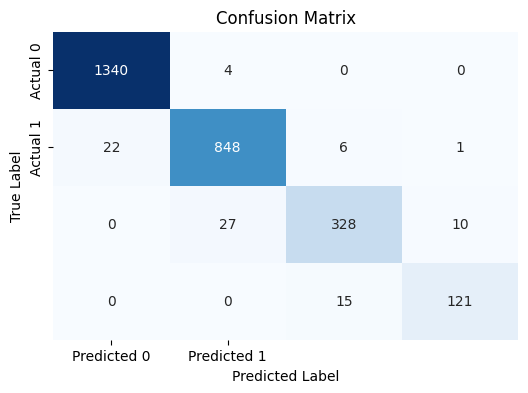

In [85]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [86]:
print('True', y_test.values[0:25])
print('Pred', y_pred[0:25])

True [1 1 2 3 2 1 1 1 1 2 1 1 1 1 2 1 1 2 2 2 1 1 1 1 3]
Pred [1 1 2 3 2 1 1 1 1 2 1 1 1 1 2 1 1 2 2 2 1 1 1 1 3]
